In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
file_path = '/kaggle/input/steel-plate-fault/faults.csv'
data = pd.read_csv(file_path)

In [31]:
print(data.head())
print(data.info())
print(data.describe())


   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42       50.0     270900     270944           267           17   
1        645      651.0    2538079    2538108           108           10   
2        829      835.0    1553913    1553931            71            8   
3        853      860.0     369370     369415           176           13   
4       1289     1306.0     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0                    108  ...         0.4706         1.0000   
1                    123  ...         0.6000         0.9

In [32]:
X = data.drop(columns='target')
y = data['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [35]:
pipeline_svc = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

In [36]:
pipeline_rf.fit(X_train, y_train)
pipeline_svc.fit(X_train, y_train)

# Predict and evaluate the models
rf_pred = pipeline_rf.predict(X_test)
svc_pred = pipeline_svc.predict(X_test)

In [37]:
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(classification_report(y_test, rf_pred))

Random Forest Classifier:
Accuracy: 0.781491002570694
              precision    recall  f1-score   support

       Bumps       0.65      0.60      0.62        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.96      0.95      0.96        83
Other_Faults       0.73      0.78      0.75       143
      Pastry       0.59      0.55      0.57        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       0.93      0.90      0.91        41

    accuracy                           0.78       389
   macro avg       0.78      0.78      0.78       389
weighted avg       0.78      0.78      0.78       389



In [38]:
print("Support Vector Machine Classifier:")
print(f"Accuracy: {accuracy_score(y_test, svc_pred)}")
print(classification_report(y_test, svc_pred))

Support Vector Machine Classifier:
Accuracy: 0.7455012853470437
              precision    recall  f1-score   support

       Bumps       0.60      0.64      0.62        72
   Dirtiness       0.55      0.75      0.63         8
    K_Scatch       0.97      0.89      0.93        83
Other_Faults       0.71      0.73      0.72       143
      Pastry       0.63      0.41      0.50        29
      Stains       0.86      0.92      0.89        13
   Z_Scratch       0.80      0.88      0.84        41

    accuracy                           0.75       389
   macro avg       0.73      0.75      0.73       389
weighted avg       0.75      0.75      0.74       389



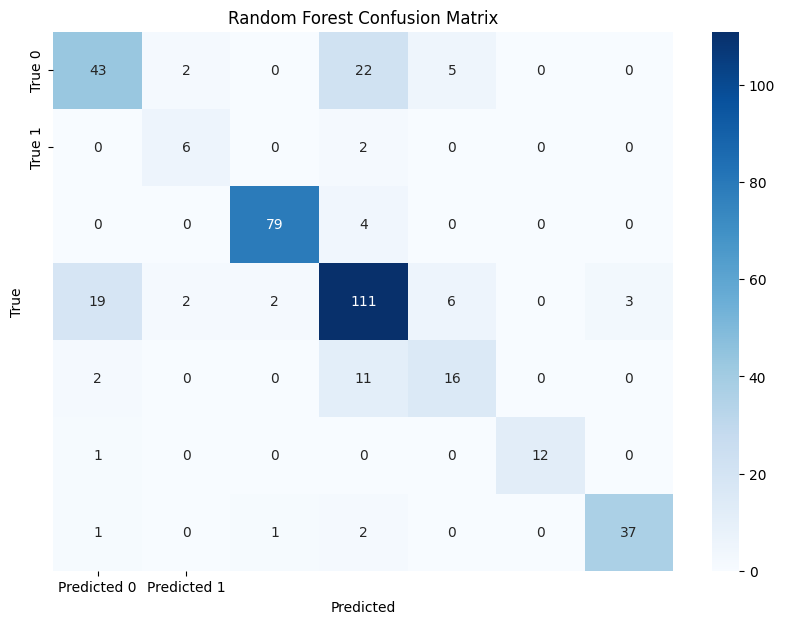

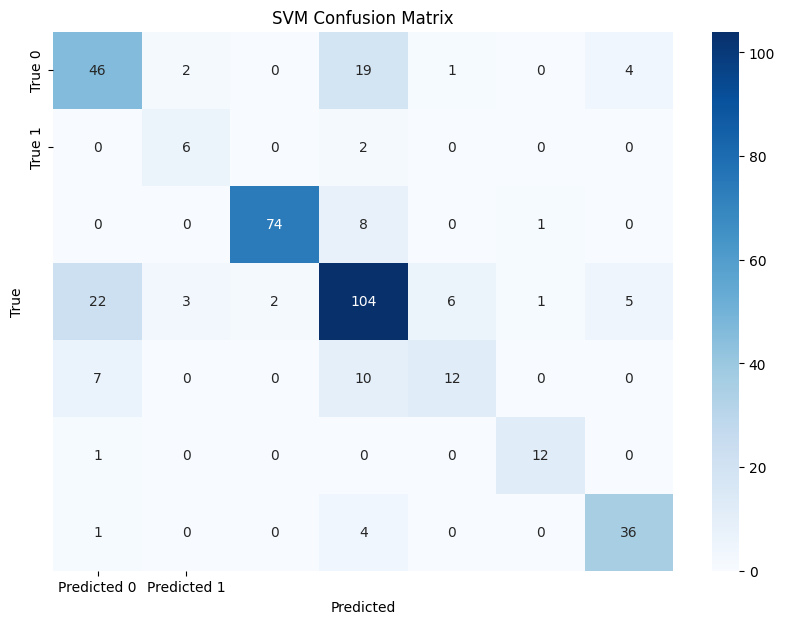

In [39]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, svc_pred, 'SVM Confusion Matrix')